In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where
from sklearn import metrics
from sklearn.model_selection import KFold

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/usa-covid-new.csv', parse_dates=True)
data = data.fillna(0)
data["date"] = pd.to_datetime(data["date"])
data["date"] = data["date"].astype("int64")
df = data[['date','new_cases']]
print(df.head())

                  date  new_cases
0  1578009600000000000          0
1  1578096000000000000          0
2  1578182400000000000          0
3  1578268800000000000          0
4  1578355200000000000          0


Precision:  0.0437246963562753  Recall:  0.0437246963562753  F1:  0.0437246963562753


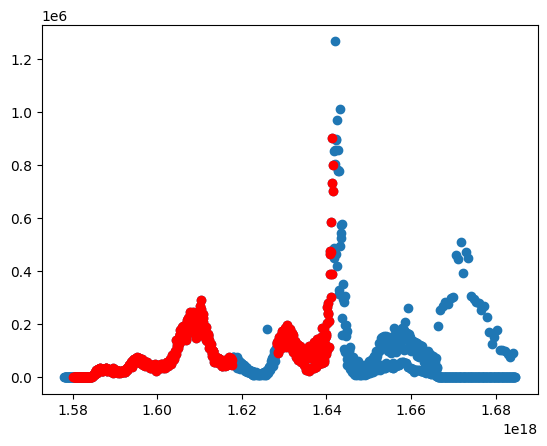

In [ ]:
model = OneClassSVM(kernel = 'rbf', gamma = "auto", nu = 0.02).fit(df) #F1 0.043
# model = OneClassSVM(kernel = 'poly', degree = 1).fit(df) #F1 0.041
# model = OneClassSVM(kernel = 'linear').fit(df) #F1: 0.041
# prediction
y_pred = model.predict(df)
y_pred
# filter outlier index
outlier_index = where(y_pred == -1)
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values
# visualize outputs
plt.scatter(data["date"], df["new_cases"])
plt.scatter(outlier_values["date"], outlier_values["new_cases"], c = "r")
# Calculate the precision and recall of the model
precision = metrics.precision_score(data["outliers"], y_pred, average="micro")
recall = metrics.recall_score(data["outliers"], y_pred, average="micro")
f1 = metrics.f1_score(data["outliers"], y_pred, average="micro")
print("Precision: ",precision," Recall: ",recall," F1: ",f1)

In [ ]:
#Using cross validation
# Create the SVM model
clf = OneClassSVM(kernel="rbf", gamma="auto",nu=0.02)

# Create a KFold object
kf = KFold(n_splits=10)

# Evaluate the model using cross-validation
f1_scores = []
for train_index, test_index in kf.split(data):
    # Train the model on the training data
    clf.fit(df.iloc[train_index, :])

    # Predict the labels of the test data
    predictions = clf.predict(df.iloc[test_index, :])

    # Calculate the F1 score
    f1_score_new = metrics.f1_score(data.iloc[test_index,:]["outliers"], predictions,average="micro")
    f1_scores.append(f1_score_new)

# Print the average F1 score
print(f"Average F1 score: {np.mean(f1_scores):.2f}")

Average F1 score: 0.00
